# Laboratory 2.3

Welcome to Lab 2.3. In this Lab, we will learn how to adjust parameters to improve the performance of the YOLOv5 model.

## Overview

Most good results can be obtained without changing the model or training settings, as long as your dataset is large enough and clearly labeled. If you don’t get good results initially, you can take some steps to improve, but we always recommend training first with all default settings before considering any changes. This helps us establish the initial performance and make more accurate judgments.

## Learning Objectives
After completing this exercise, students will learn:
  - Methods to improve the performance of the model
  - The impact of important parameters on the model

## Related Knowledge
  - Python
  - YOLO

## Required Background
To complete this exercise, you will need the following knowledge:
  - Basic programming skills with Python
  - Basic theory about YOLO

## Problem Statement
**Goal**: Improve the performance of the YOLOv5 model

## Instructions

Below are the steps to help you improve the performance of the YOLOv5 model.



### Libraries

In [ ]:
#clone YOLOv5
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

### Dataset

1. **Number of images per class**: There should be at least **1500 images** for each object class.
2. **Number of objects per class**: Each object class should have **at least 10,000 objects** (labeled objects).
3. **Diversity of images**: The dataset should reflect the real-world environment in which the model will be deployed. For real-world use cases, we recommend collecting images at different times of the day, in different seasons, weather conditions, lighting conditions, viewpoints, and from various sources (taken from the internet, on-site collection, using different types of cameras, etc.).
4. **Label consistency**: All objects of all classes in every image must be fully labeled. Incomplete labeling will not be effective.
5. **Label accuracy**: Labels must precisely enclose the object. There should be no gaps between the object and its bounding box. All objects must be fully labeled.
6. **Label verification**: When starting the training process, check collages such as *train_batch.jpg* to verify that your labels appear correctly.
7. **Background images**: Background images are those that do not contain any objects and are added to the dataset to reduce false positives (FP). We recommend approximately **0-10%** background images in the dataset to help reduce FP (the COCO dataset has 1000 background images, accounting for 1% of the total images). Background images do not need to be labeled.

Compare the performance of the datasets:


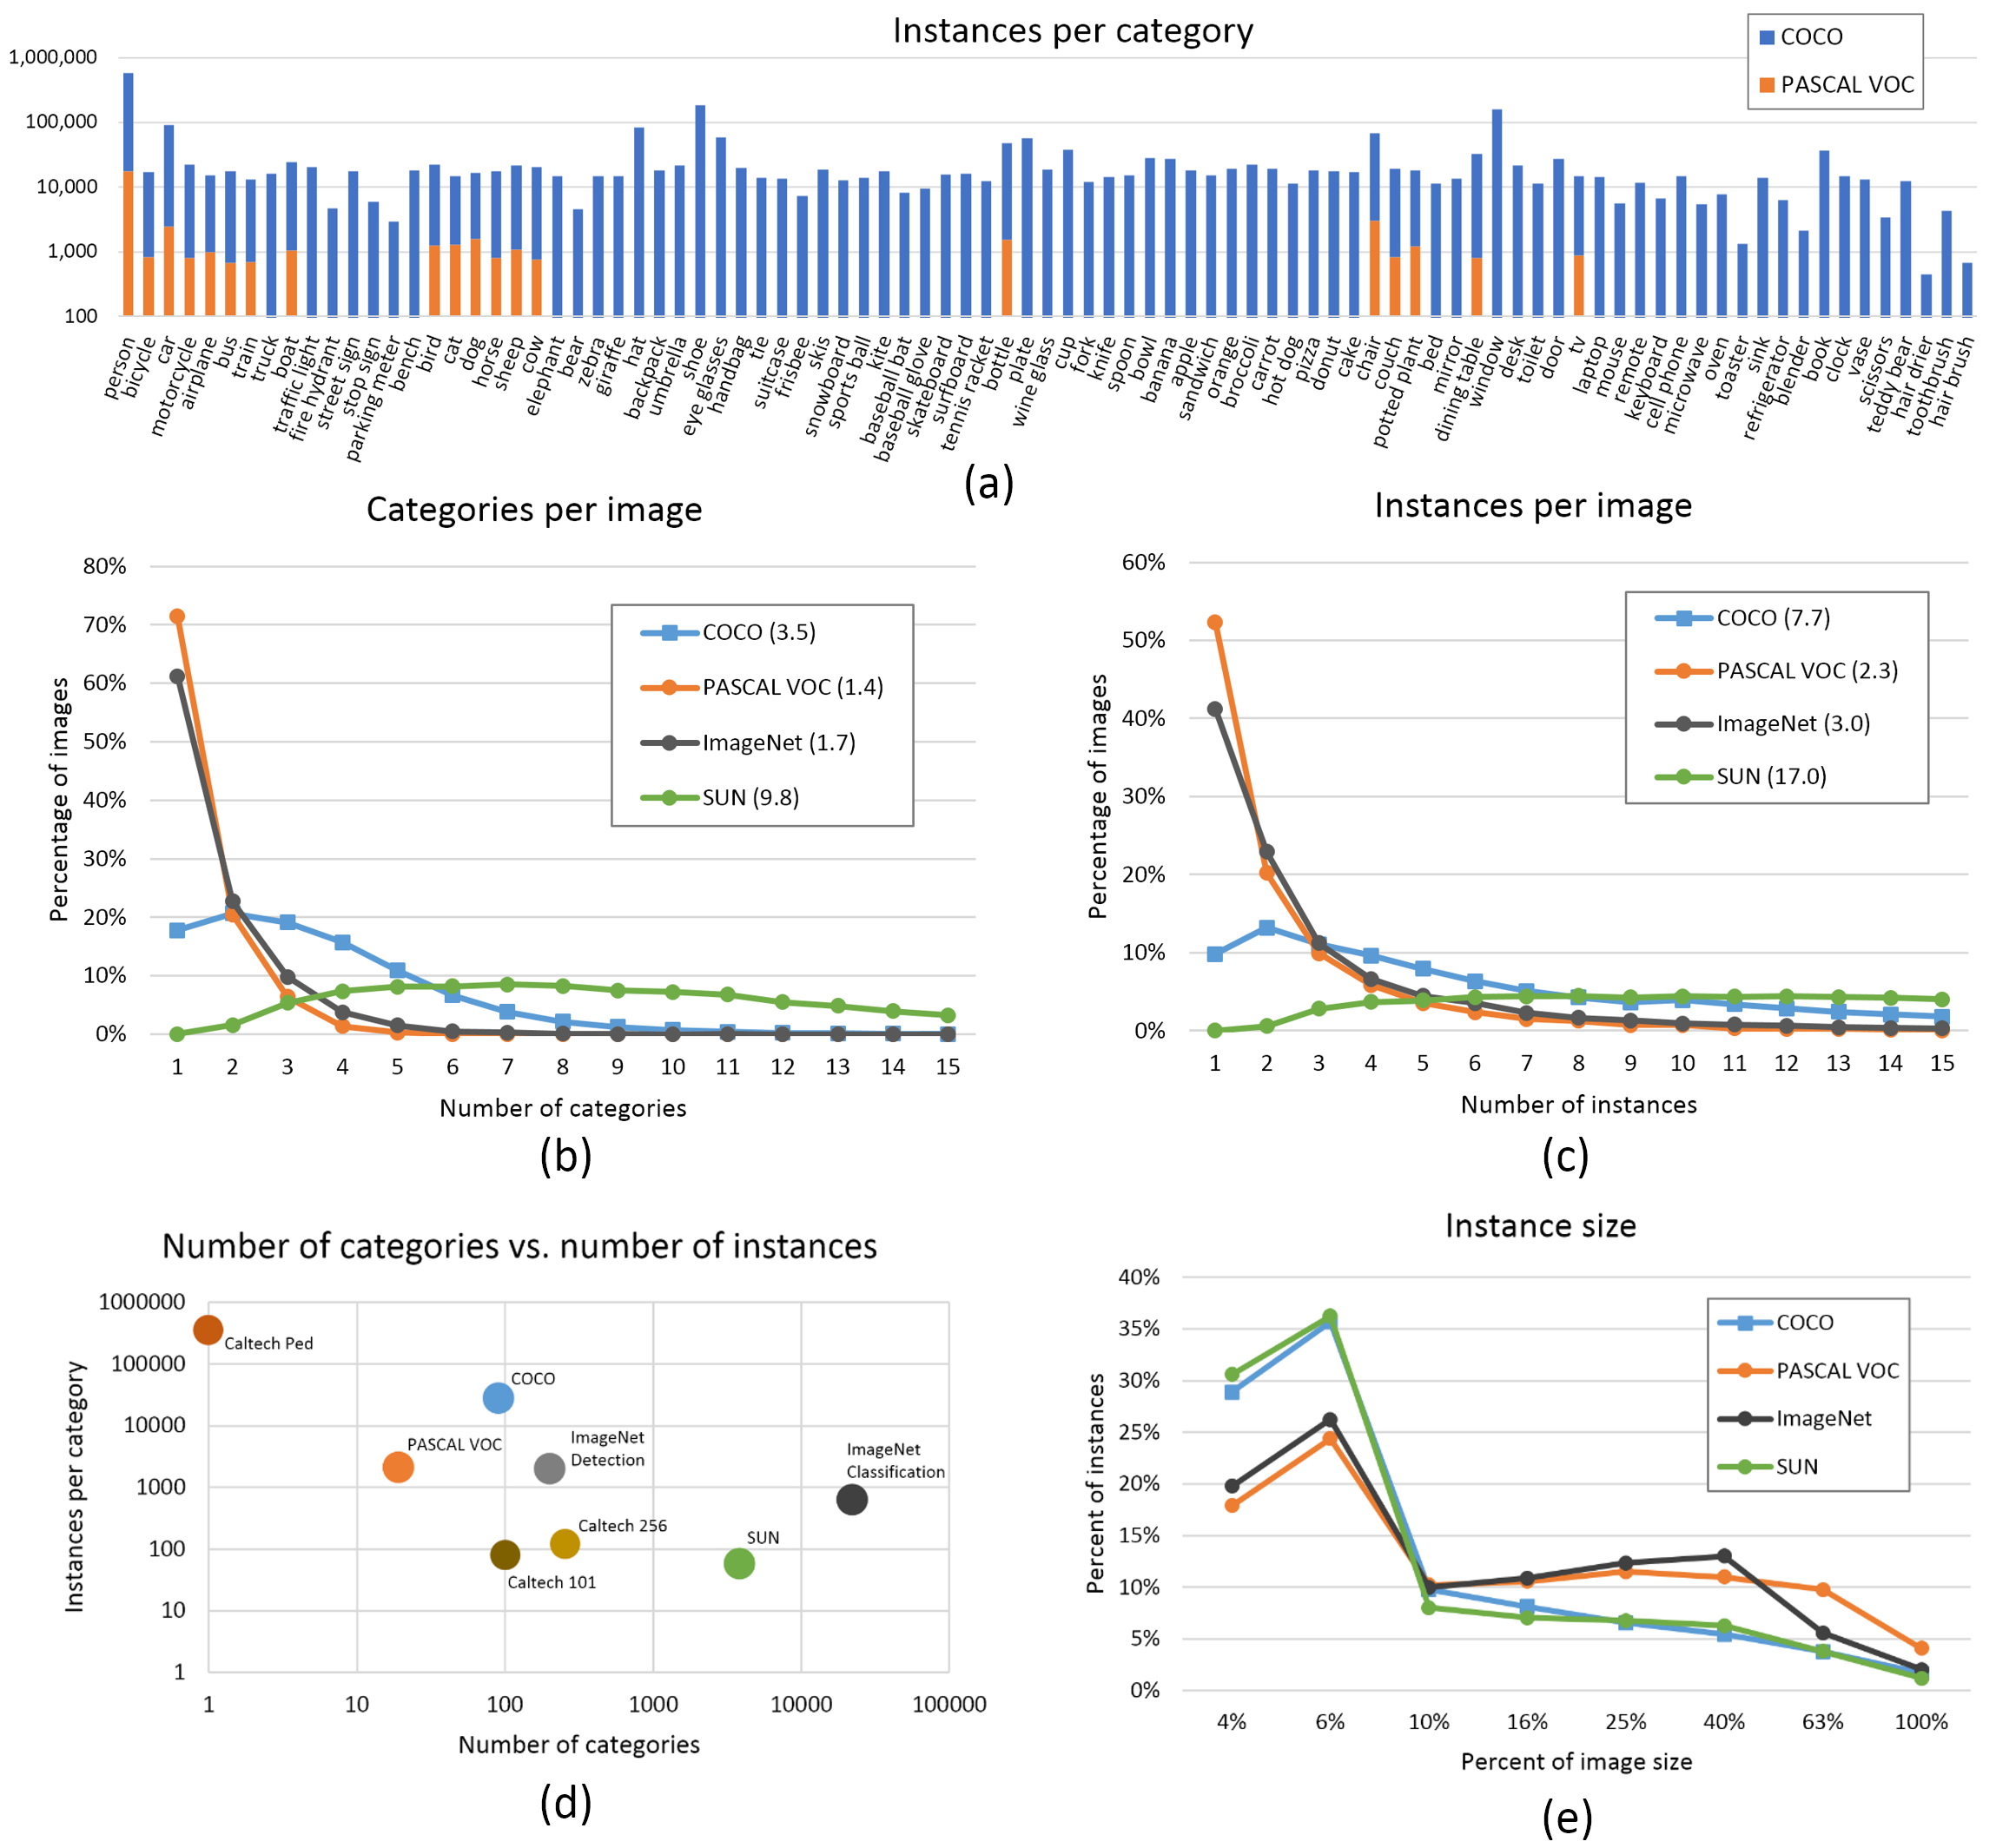

In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

**Exercise 1:** Complete the following code to upload the dataset to colab.

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key=[...])
project = rf.workspace().project([...])
version = project.version([...])
dataset = project.version([...]).download([...])

### Model Selection
Larger models like YOLOv5x and YOLOv5x6 will produce better results in most cases, but they have more parameters, require more CUDA memory to train, and run slower. For mobile deployment, we recommend YOLOv5s/m, and for cloud deployment, we recommend YOLOv5l/x.

The performance and speed of the models are described in the following image:


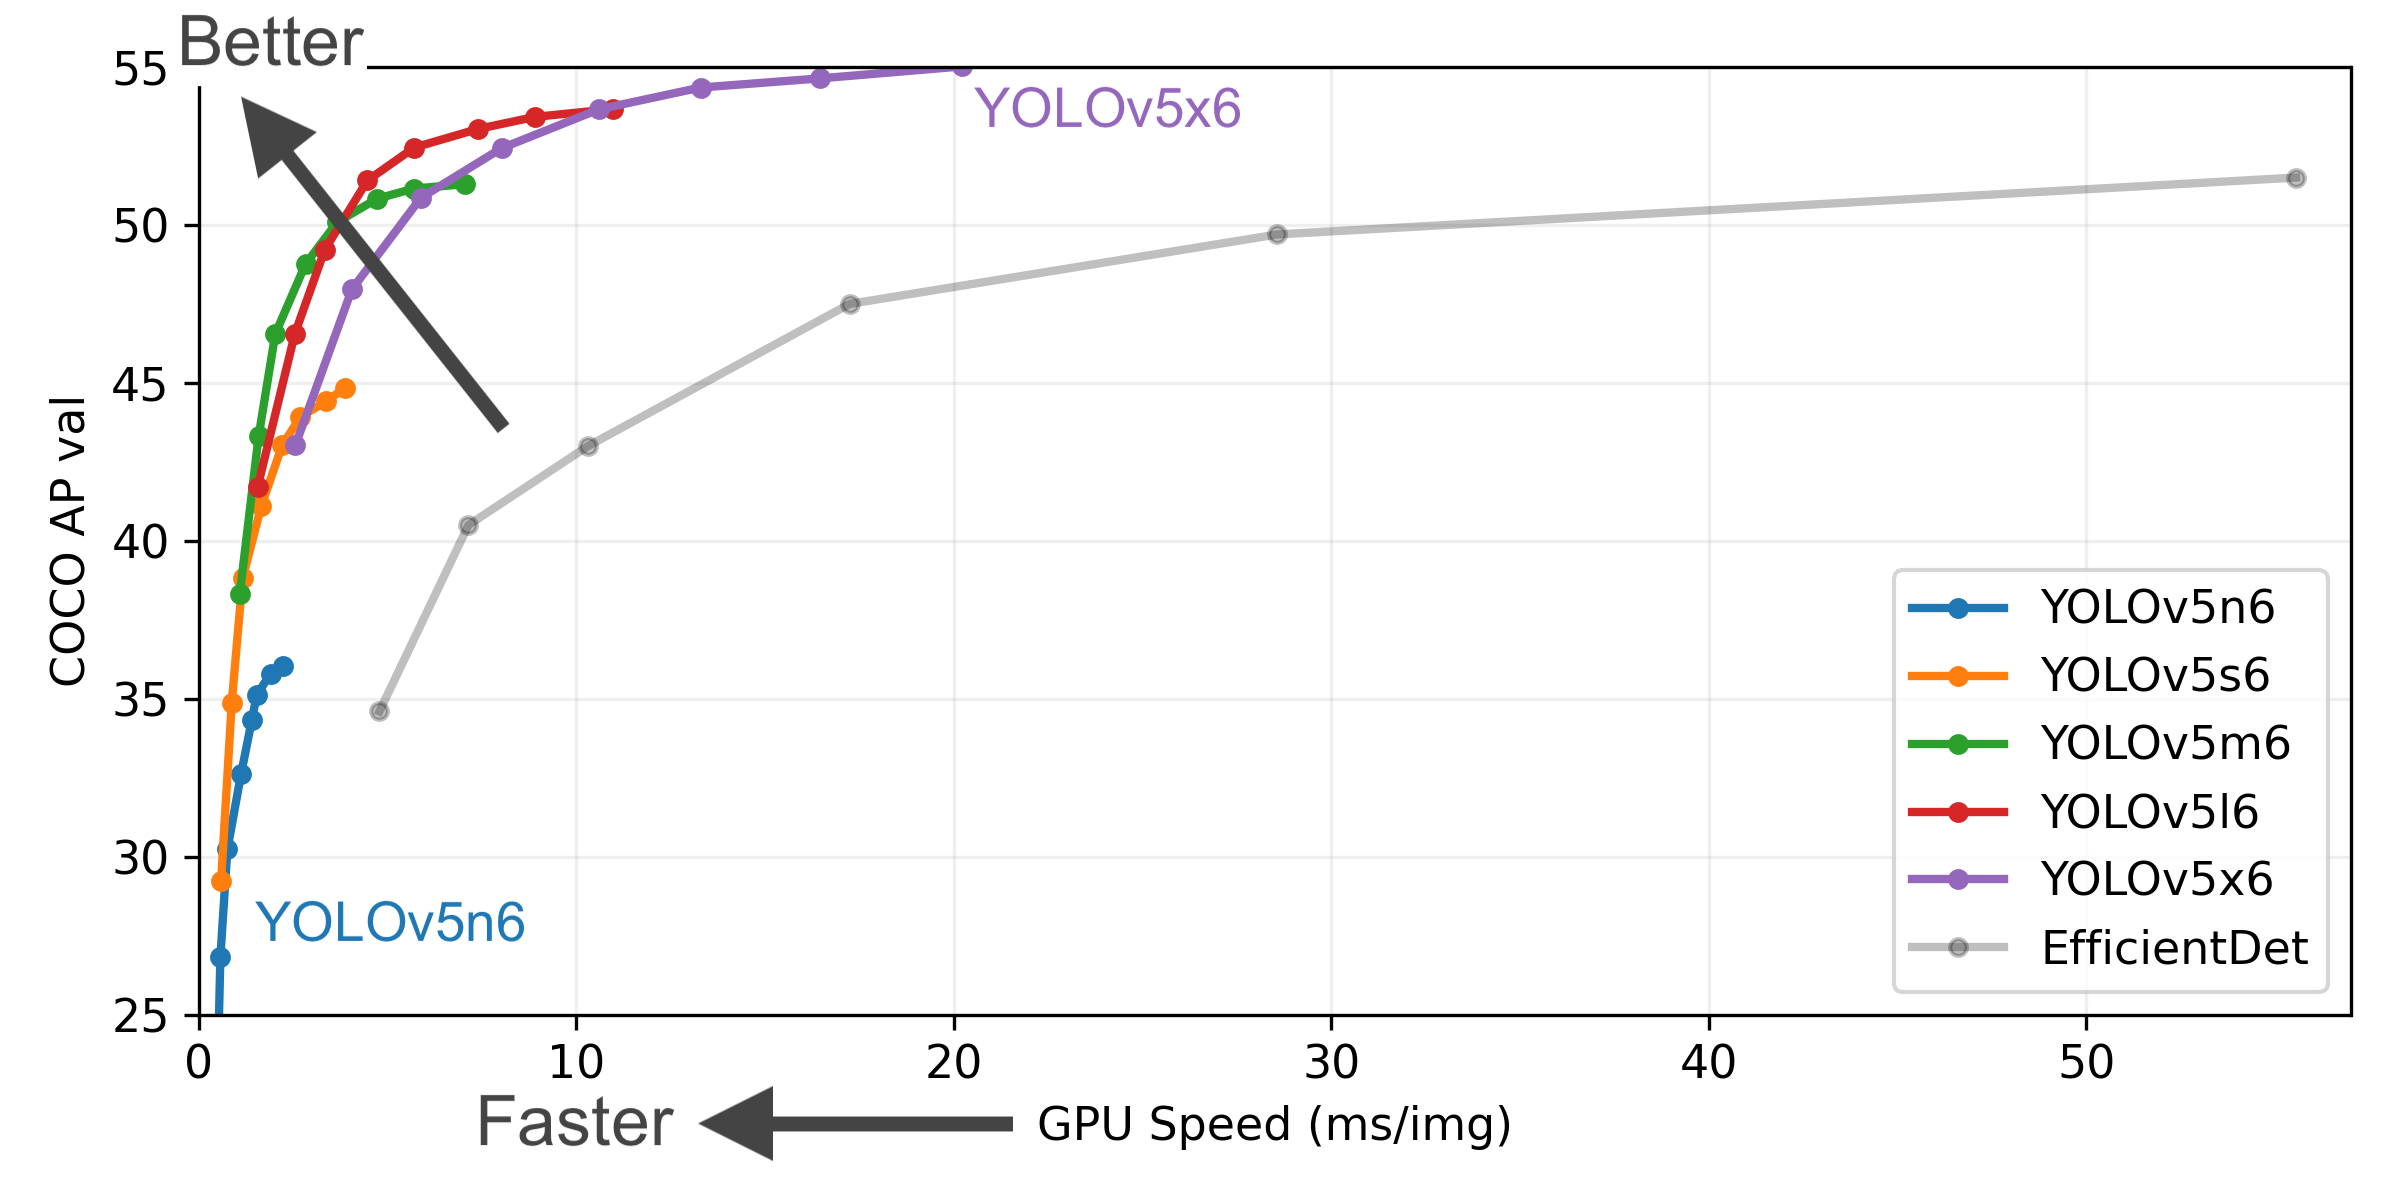

### Parameter Tuning
These parameters play an important role in adjusting and optimizing the effectiveness of the YOLOv5 model:

1. **img**:
   - Input image size (e.g., 640, 416, ...). This size affects the resolution of the image and, therefore, the model's ability to detect details. Larger images can help the model detect more details but also require more computational resources and may slow down processing speed.

2. **rect**:
   - When enabled (True), input images are cropped and resized according to the original aspect ratio (rectangular training). This can help the model detect objects that are not square-shaped better.

3. **batch**:
   - Batch size (number of images processed simultaneously in one run) affects the training of the model. Larger batches can help stabilize the training process but require more GPU memory. Smaller batches may allow the model to learn more details but are more susceptible to noise.

4. **epochs**:
   - The number of iterations to train the entire dataset. More epochs help the model learn better, but too many epochs can lead to overfitting, where the model learns too well on the training data and does not generalize well to new data.
   - Start with 300 epochs. If this causes the model to overfit, you can reduce the number of epochs. If overfitting does not occur after 300 epochs, train longer, i.e., 600, 1200 epochs, etc.

5. **weights**:
   - Initial model weights. Pre-trained weights on other datasets can be used, or the model can be trained from scratch (no initial weights). Using pre-trained weights can help the model learn faster and achieve better performance.

6. **cfg**:
   - Configuration file specifying the model architecture. yolov5s is the smallest and fastest version, suitable for limited computational environments or when high speed is needed. However, it may not perform as well as larger versions like yolov5m, yolov5l, or yolov5x.

7. **patience**:
   - The maximum number of epochs the model can continue to train without improvement (early stopping). This parameter helps avoid overtraining, saving time and resources.

8. **hyp**:
   - Hyperparameters, including settings like learning rate, momentum, weight decay, etc.
   - The default hyperparameters are in the **hyp.scratch-low.yaml** file. We recommend training with the default hyperparameters before considering adjusting any parameters. Generally, increasing augmentation hyperparameters will help reduce and delay overfitting, allowing longer training and achieving higher final mAP. Reducing the hyperparameters that adjust loss components like **hyp['obj']** will help reduce overfitting in those specific loss components.

9. **data**:
   - The data configuration file contains information about the paths to the training set, test set, and object classes to detect. This parameter determines what data the model will be trained on and what the objectives are.

Understanding and adjusting these parameters is essential for optimizing the YOLOv5 model for specific problems.


**Exercise 2:** Complete the following code by choosing the parameters to train the model.


In [ ]:
!python train.py --img [...] --batch [...] --epochs [...] --data [...] --cfg [...] --weights '' --name [...] --cache --patience [...] -- hyp [...]

### Model Evaluation

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

### Run the detect function with the trained weights
Run inference with the pre-trained checkpoint on the contents of the test/image directory downloaded from Roboflow.


**Exercise 3:** Complete the following code to view the model's results on the test set.


In [ ]:
!python detect.py --weights [...] --img [...] --conf [...] --source [...]

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

### Save Results

Congratulations! You have completed training the YOLOv5 model with customized parameters. It is a difficult and challenging process to find the right weights for your problem and scope. So keep experimenting.

To save the weights for reuse and apply them to the vehicle model, run the code below.


In [ ]:
#export your model's weights for future use
from google.colab import files
files.download([...])